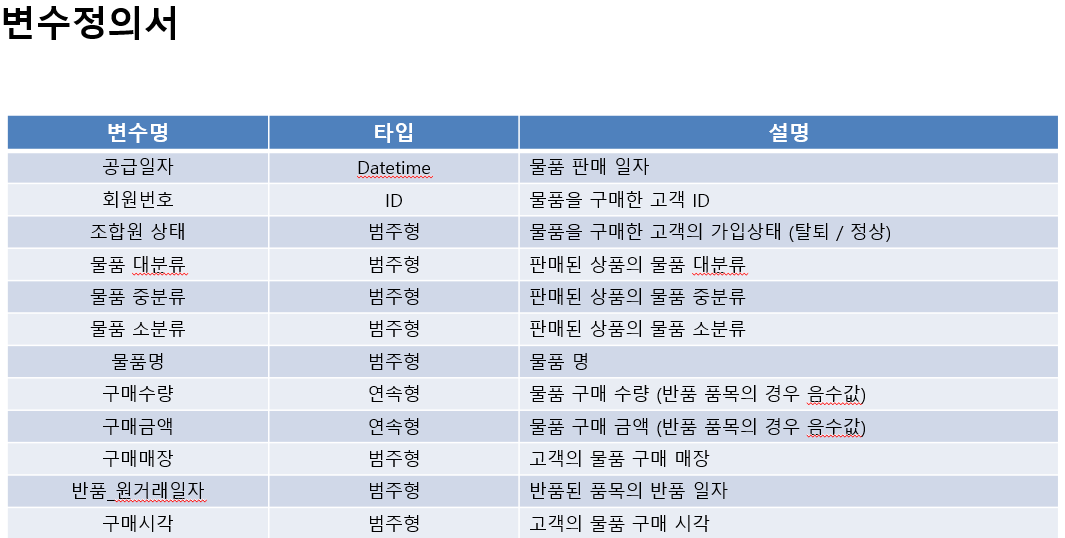

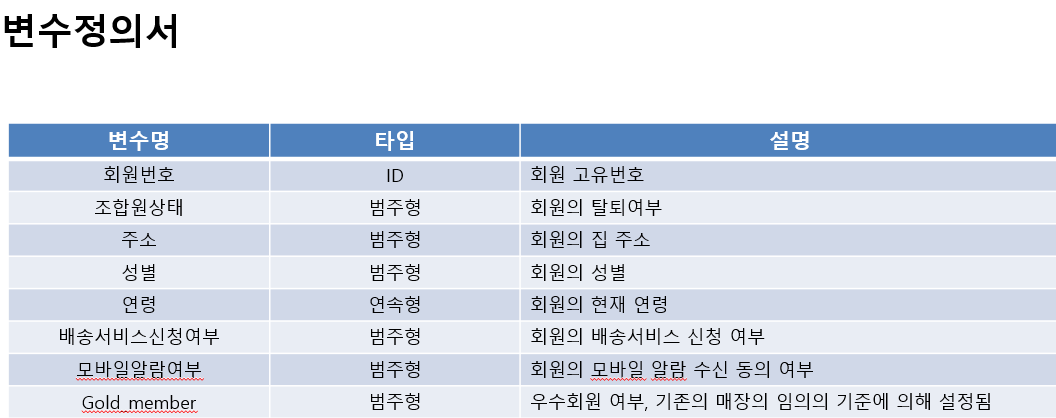

In [ ]:
#데이터 구성 패키지
import pandas as pd
#행렬 연산 패키지
import numpy as np
#데이터 시각화 패키지
import matplotlib
#한글 폰트 적용
matplotlib.rc('font', family='Malgun Gothic')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.stattools import omni_normtest
from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse

from statsmodels.api import Logit
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
!apt -qq -y install fonts-nanum > /dev/null

import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

font = fm.FontProperties(fname=fontpath, size=9)

fm._rebuild()

# 그래프에 retina display 적용

%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정

plt.rc('font', family='NanumBarunGothic') 


## <font color='Blue'><div style="text-align: left"> 이상치 탐색 </font> 

In [ ]:
df_m = pd.read_csv('/content/drive/My Drive/(개인)_AI _빅데이터_아카데미/B1_마켓_DataSet/member_data.csv')
df_m_c = df_m.copy()
df_m.head()

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member
0,1000012800,정상회원,수지구-풍덕천동,여,58.0,미신청,.,normal
1,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal
2,1000122304,정상회원,광주-기타,여,38.0,미신청,.,normal
3,1000163136,정상회원,수지구-동천동,여,73.0,미신청,.,normal
4,1000281920,정상회원,수지구-풍덕천동,여,42.0,신청,.,normal


In [ ]:
df_p1 = pd.read_csv('/content/drive/My Drive/(개인)_AI _빅데이터_아카데미/B1_마켓_DataSet/product_data_01.csv')
df_p1_c = df_m.copy()
df_p1.head()

,공급일자,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,구매시각
0,2018-01-02,272369856,정상회원,과실,과일,사과,사과/유(1.5kg),1.0,22207,매장C,NaN,10:04
1,2018-01-02,1476143616,정상회원,간식,빵,"식빵, 식사대용",아침빵(240g/8개)/매장,1.0,4403,매장C,NaN,10:09
2,2018-01-02,743192512,정상회원,채소,양념채소,생강,생강(300g),1.0,7083,매장C,NaN,10:12
3,2018-01-02,176912064,정상회원,축산물,유제품,우유/산양유,유기농저지방우유(종이팩/900ml),1.0,7849,매장C,NaN,10:23
4,2018-01-02,87592064,정상회원,양념/가루,가루,양념가루,카레(매운맛: 100g),3.0,15507,매장C,NaN,10:29


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_p2 = pd.read_csv('/content/drive/My Drive/(개인)_AI _빅데이터_아카데미/B1_마켓_DataSet/product_data_02.csv')
df_p2_c = df_m.copy()
df_p2.head()

,공급일자,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,구매시각
0,2018-01-02,133834304,정상회원,잡곡,콩/화본/깨,화본,귀리(무/500g),1.0,8232,매장D,NaN,10:32
1,2018-01-02,749556736,정상회원,잡곡,콩/화본/깨,토종,선비콩/유(500g),1.0,17038,매장D,NaN,10:44
2,2018-01-02,787320768,정상회원,채소,잎/줄기채소,시금치,시금치(300g),1.0,4403,매장D,NaN,11:10
3,2018-01-02,175843008,정상회원,채소,뿌리채소,당근,당근(500g),2.0,5360,매장D,NaN,11:45
4,2018-01-02,165261952,정상회원,간식,밀가공,만두,군만두(500g),1.0,8998,매장D,NaN,12:14


In [ ]:
df_p3 = pd.read_csv('/content/drive/My Drive/(개인)_AI _빅데이터_아카데미/B1_마켓_DataSet/product_data_03.csv')
df_p3_c = df_m.copy()
df_p3.head()

,공급일자,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,구매시각
0,2018-01-02,345017408,정상회원,양념/가루,장,장류/기타,청국장(150g),1.0,4786,매장B,NaN,10:20
1,2018-01-02,395094144,정상회원,간식,빵,"식빵, 식사대용",아침빵(240g/8개)/매장,1.0,4403,매장B,NaN,10:38
2,2018-01-02,735399168,정상회원,축산물,알,유정란,동물복지유정란/중란(10알/국내산),1.0,5552,매장B,NaN,10:59
3,2018-01-02,1226079168,정상회원,반찬,어묵/묵,어묵,명태참어묵(300g),1.0,7275,매장B,NaN,11:19
4,2018-01-02,748032960,정상회원,채소,잎/줄기채소,시금치,시금치(300g),1.0,4403,매장B,NaN,11:30


In [ ]:
df_p4 = pd.read_csv('/content/drive/My Drive/(개인)_AI _빅데이터_아카데미/B1_마켓_DataSet/product_data_04.csv')
df_p4_c = df_m.copy()
df_p4.head()

,공급일자,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,구매시각
0,2018-01-02,220954944,정상회원,반찬,두부/유부,두부,두부(1모:420g),1.0,3829,매장A,NaN,10:32
1,2018-01-02,89023040,정상회원,채소,열매채소,단호박/손질,단호박(깍뚝썰기/300g),1.0,4977,매장A,NaN,10:41
2,2018-01-02,354941440,정상회원,축산물,알,유정란,유정란/매장용(10알/국내산),1.0,7083,매장A,NaN,11:00
3,2018-01-02,786634048,탈퇴,반찬,어묵/묵,묵,도토리묵(420g:1모),1.0,7083,매장A,NaN,11:28
4,2018-01-02,438543104,정상회원,축산물,알,유정란,유정란/매장용(10알/국내산),1.0,7083,매장A,NaN,11:59


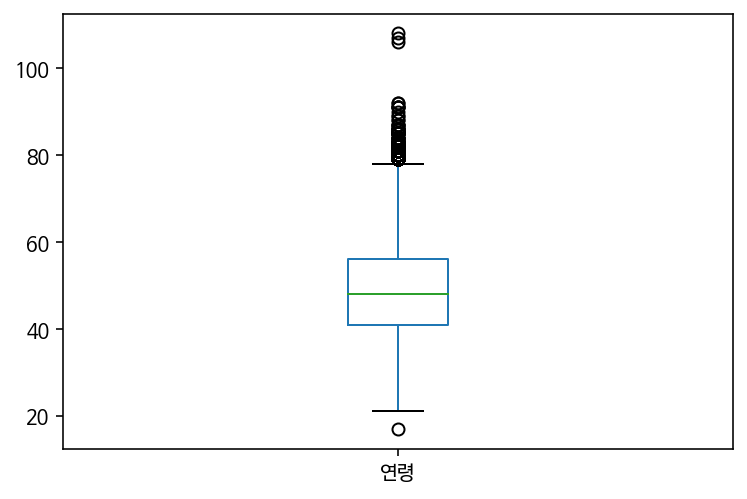

In [ ]:
#회원 이상치 탐색
df_m[['연령']].plot.box()

In [ ]:
# 100세 이상 제거
anomaly_id = df_m[df_m['연령']>=100]['회원번호']
anomaly_id = list(anomaly_id)
anomaly_id

[1670620864, 623725504, 742461248]

In [ ]:
print(df_m.info)
for i in anomaly_id:
  df_m = df_m[df_m['회원번호'] != i]
  df_p1 = df_p1[df_p1['회원번호']!= i]
  df_p2 = df_p2[df_p2['회원번호']!= i]
  df_p3 = df_p3[df_p3['회원번호']!= i]
  df_p4 = df_p4[df_p4['회원번호']!= i]

<bound method DataFrame.info of              회원번호 조합원상태        주소 성별    연령 배송서비스신청여부 모바일알람여부 Gold_member
0      1000012800  정상회원  수지구-풍덕천동  여  58.0       미신청       .      normal
1      1000103744  정상회원   처인구-고림동  여  34.0       미신청       .      normal
2      1000122304  정상회원     광주-기타  여  38.0       미신청       .      normal
3      1000163136  정상회원   수지구-동천동  여  73.0       미신청       .      normal
4      1000281920  정상회원  수지구-풍덕천동  여  42.0        신청       .      normal
...           ...   ...       ... ..   ...       ...     ...         ...
11550   999682432    탈퇴   수지구-동천동  여  47.0       미신청       .      normal
11551   999721408  정상회원   수지구-동천동  여  43.0       미신청       .      normal
11552   999738112  정상회원   수지구-성복동  여  67.0       미신청       .      normal
11553   999754816  정상회원   수지구-상현동  여  44.0        신청       .      normal
11554    99995712  정상회원   수지구-상현동  여  66.0       미신청       .      normal

[11555 rows x 8 columns]>


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


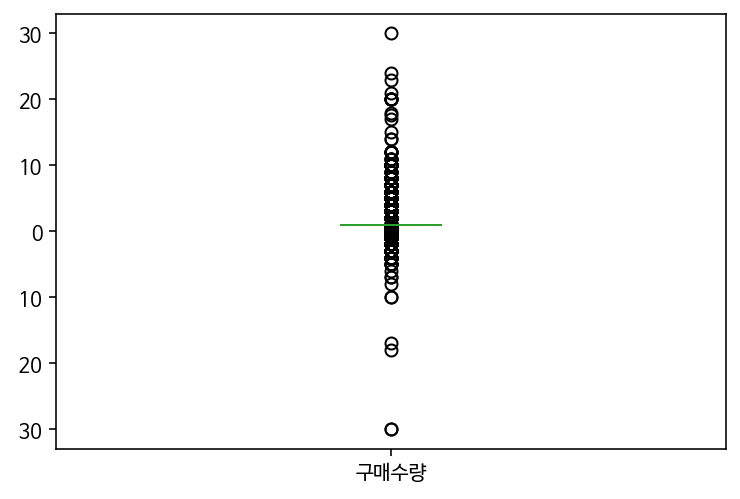

In [ ]:
df_p1[['구매수량']].plot.box()

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


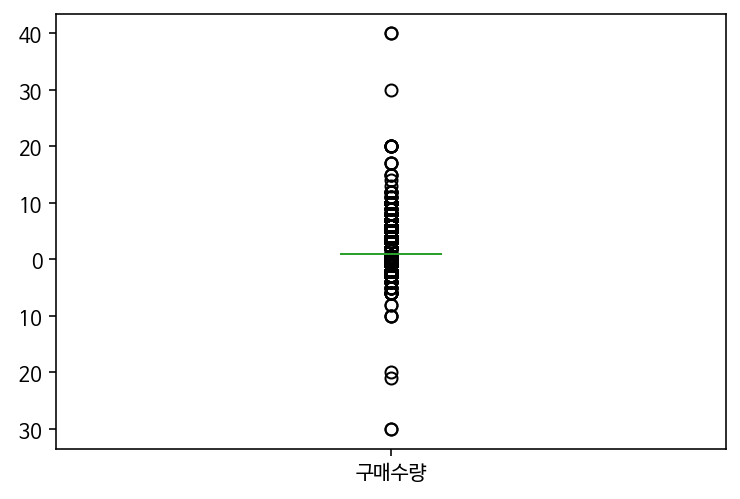

In [ ]:
df_p2[['구매수량']].plot.box()

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


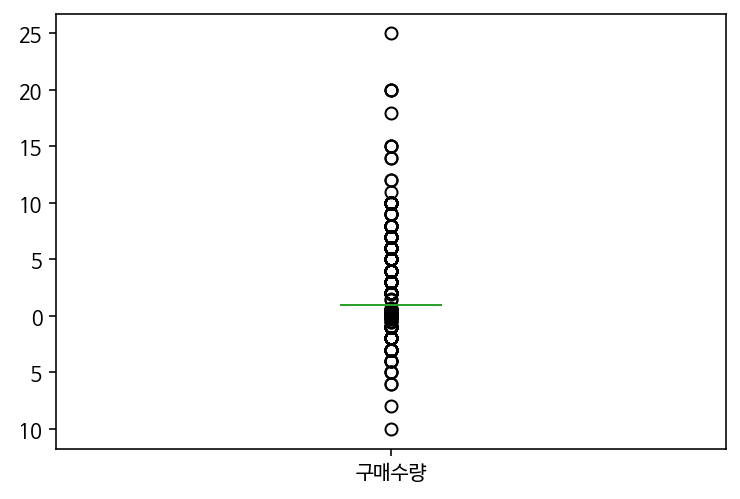

In [ ]:
df_p3[['구매수량']].plot.box()

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


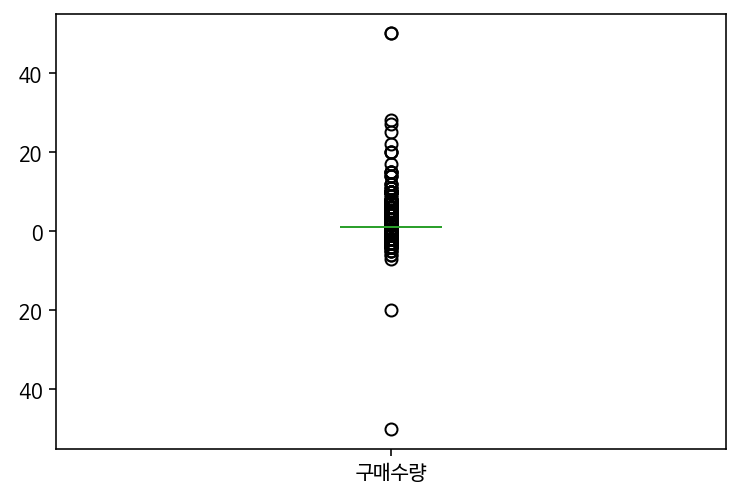

In [ ]:
df_p4[['구매수량']].plot.box()

In [ ]:
df_p1[df_p1['구매수량']<= -20] #30개씩이나 반품한다고? 이걸 받아준다고 ??

,공급일자,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,구매시각
79806,2018-07-13,1056318272,정상회원,채소,콩나물,콩나물,콩나물(300g),-30.0,-74662,매장C,20180713.0,18:47
93111,2018-08-14,817631104,정상회원,생활용품,생활용품,휴지,숲사랑 미용사각휴지(3상자),-30.0,-212500,매장C,20180810.0,11:34


<Figure size 1080x1080 with 0 Axes>

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


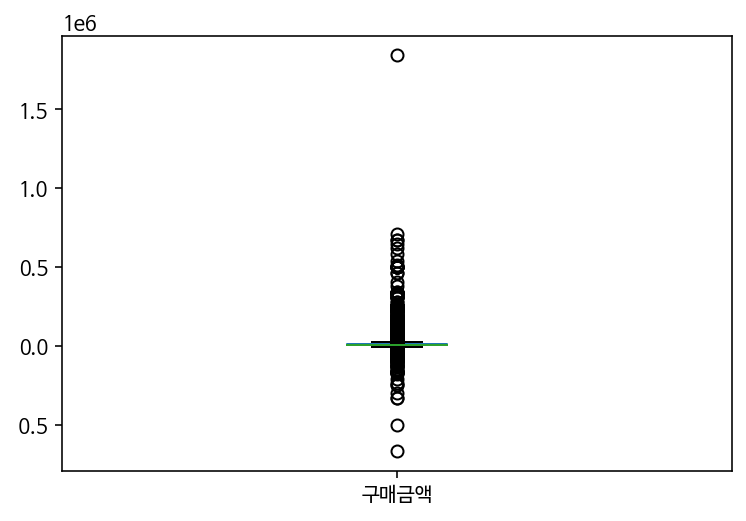

In [ ]:
plt.figure(figsize=(15,15))
df_p1[['구매금액']].plot(kind ='box', rot = 0)
plt.show()

In [ ]:
df_p1[df_p1['구매금액']>= 1000000] 

,공급일자,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,구매시각
76897,2018-07-07,357357952,정상회원,건강,홍삼/녹용,홍삼,홍삼액(6년근/60봉),8.0,1837838,매장C,NaN,16:23


In [ ]:
df_p1[df_p1['구매금액']<= -300000] 

,공급일자,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,구매시각
15362,2018-02-06,768478656,정상회원,건강,건강일반,추출/농축액,흑염소진액(100ml*30봉),-2.0,-333108,매장C,20180206.0,18:22
15486,2018-02-06,22270144,정상회원,건강,건강일반,추출/농축액,흑염소진액(100ml*30봉),-2.0,-333108,매장C,20180206.0,19:41
15524,2018-02-06,1031186176,정상회원,건강,건강일반,추출/농축액,흑염소진액(100ml*30봉),-3.0,-499662,매장C,20180206.0,16:04
16917,2018-02-09,1529962048,정상회원,건강,건강일반,추출/농축액,흑염소진액(100ml*30봉),-4.0,-666216,매장C,20180206.0,16:59
103207,2018-09-08,22270144,정상회원,축산물,꿀,꿀부산물,로얄제리(50g),-4.0,-302477,매장C,20180908.0,15:08


In [ ]:
# for i in range(len(df_p1)):
#   date = df_p1.iloc[i][0]
#   date = date.split('-')
#   date = date[0] + date[1] + date[2]
#   date = date[:-2]
#   df_p1.iloc[i][0] = date



## <font color='Blue'><div style="text-align: left"> VIP여부와 배송서비스 탐색적 분석 </font> 

In [ ]:
df_test = pd.read_csv('/content/drive/My Drive/(개인)_AI _빅데이터_아카데미/B1_마켓_DataSet/product_member_data.csv',engine='python',encoding='euc-kr')

In [ ]:
df_test.head()

,Unnamed: 0,공급일자,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,구매시각,hour,연령,연령대,주소,성별,배송서비스신청여부,모바일알람여부,Gold_member
0,0,2018-01-02,272369856,정상회원,과실,과일,사과,사과/유(1.5kg),1.0,22207,매장C,NaN,10:04,10,45,40,수지구-풍덕천동,여,미신청,수신,VIP
1,1,2018-01-02,1476143616,정상회원,간식,빵,"식빵, 식사대용",아침빵(240g/8개)/매장,1.0,4403,매장C,NaN,10:09,10,34,30,수지구-풍덕천동,여,미신청,.,normal
2,2,2018-01-02,743192512,정상회원,채소,양념채소,생강,생강(300g),1.0,7083,매장C,NaN,10:12,10,51,50,수지구-성복동,여,신청,.,normal
3,3,2018-01-02,176912064,정상회원,축산물,유제품,우유/산양유,유기농저지방우유(종이팩/900ml),1.0,7849,매장C,NaN,10:23,10,69,60,수지구-풍덕천동,여,미신청,.,VIP
4,4,2018-01-02,87592064,정상회원,양념/가루,가루,양념가루,카레(매운맛: 100g),3.0,15507,매장C,NaN,10:29,10,73,70,수지구-풍덕천동,여,미신청,.,normal


In [ ]:
df_t = df_test[['공급일자','구매금액']]
df_t.head()

,공급일자,구매금액
0,2018-01-02,22207
1,2018-01-02,4403
2,2018-01-02,7083
3,2018-01-02,7849
4,2018-01-02,15507


In [ ]:
df_t.sum()

공급일자    2018-01-022018-01-022018-01-022018-01-022018-0...
구매금액                                           3255156423
dtype: object

In [ ]:
df_t.공급일자 = pd.to_datetime(df_t.공급일자)
# df_t.set_index('공급일자', inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
df_t.head()

,공급일자,구매금액
0,2018-01-02,22207
1,2018-01-02,4403
2,2018-01-02,7083
3,2018-01-02,7849
4,2018-01-02,15507


In [ ]:
# df_test_m = df_t.resample('MS').sum()

In [ ]:
# df_test_q = df_t.resample('QS').sum()

In [ ]:
# df_test_m.plot.bar()

In [ ]:
# df_test_q.plot.bar()

In [ ]:
df_test.head()

,Unnamed: 0,공급일자,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,구매시각,hour,연령,연령대,주소,성별,배송서비스신청여부,모바일알람여부,Gold_member
0,0,2018-01-02,272369856,정상회원,과실,과일,사과,사과/유(1.5kg),1.0,22207,매장C,NaN,10:04,10,45,40,수지구-풍덕천동,여,미신청,수신,VIP
1,1,2018-01-02,1476143616,정상회원,간식,빵,"식빵, 식사대용",아침빵(240g/8개)/매장,1.0,4403,매장C,NaN,10:09,10,34,30,수지구-풍덕천동,여,미신청,.,normal
2,2,2018-01-02,743192512,정상회원,채소,양념채소,생강,생강(300g),1.0,7083,매장C,NaN,10:12,10,51,50,수지구-성복동,여,신청,.,normal
3,3,2018-01-02,176912064,정상회원,축산물,유제품,우유/산양유,유기농저지방우유(종이팩/900ml),1.0,7849,매장C,NaN,10:23,10,69,60,수지구-풍덕천동,여,미신청,.,VIP
4,4,2018-01-02,87592064,정상회원,양념/가루,가루,양념가루,카레(매운맛: 100g),3.0,15507,매장C,NaN,10:29,10,73,70,수지구-풍덕천동,여,미신청,.,normal


In [ ]:
df_test['공급일자'] = df_test['공급일자'].astype('datetime64[ns]')

In [ ]:
df_test['요일'] = df_test.공급일자.dt.weekday

In [ ]:
df_test.head()

,Unnamed: 0,공급일자,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,구매시각,hour,연령,연령대,주소,성별,배송서비스신청여부,모바일알람여부,Gold_member,요일
0,0,2018-01-02,272369856,정상회원,과실,과일,사과,사과/유(1.5kg),1.0,22207,매장C,NaN,10:04,10,45,40,수지구-풍덕천동,여,미신청,수신,VIP,1
1,1,2018-01-02,1476143616,정상회원,간식,빵,"식빵, 식사대용",아침빵(240g/8개)/매장,1.0,4403,매장C,NaN,10:09,10,34,30,수지구-풍덕천동,여,미신청,.,normal,1
2,2,2018-01-02,743192512,정상회원,채소,양념채소,생강,생강(300g),1.0,7083,매장C,NaN,10:12,10,51,50,수지구-성복동,여,신청,.,normal,1
3,3,2018-01-02,176912064,정상회원,축산물,유제품,우유/산양유,유기농저지방우유(종이팩/900ml),1.0,7849,매장C,NaN,10:23,10,69,60,수지구-풍덕천동,여,미신청,.,VIP,1
4,4,2018-01-02,87592064,정상회원,양념/가루,가루,양념가루,카레(매운맛: 100g),3.0,15507,매장C,NaN,10:29,10,73,70,수지구-풍덕천동,여,미신청,.,normal,1


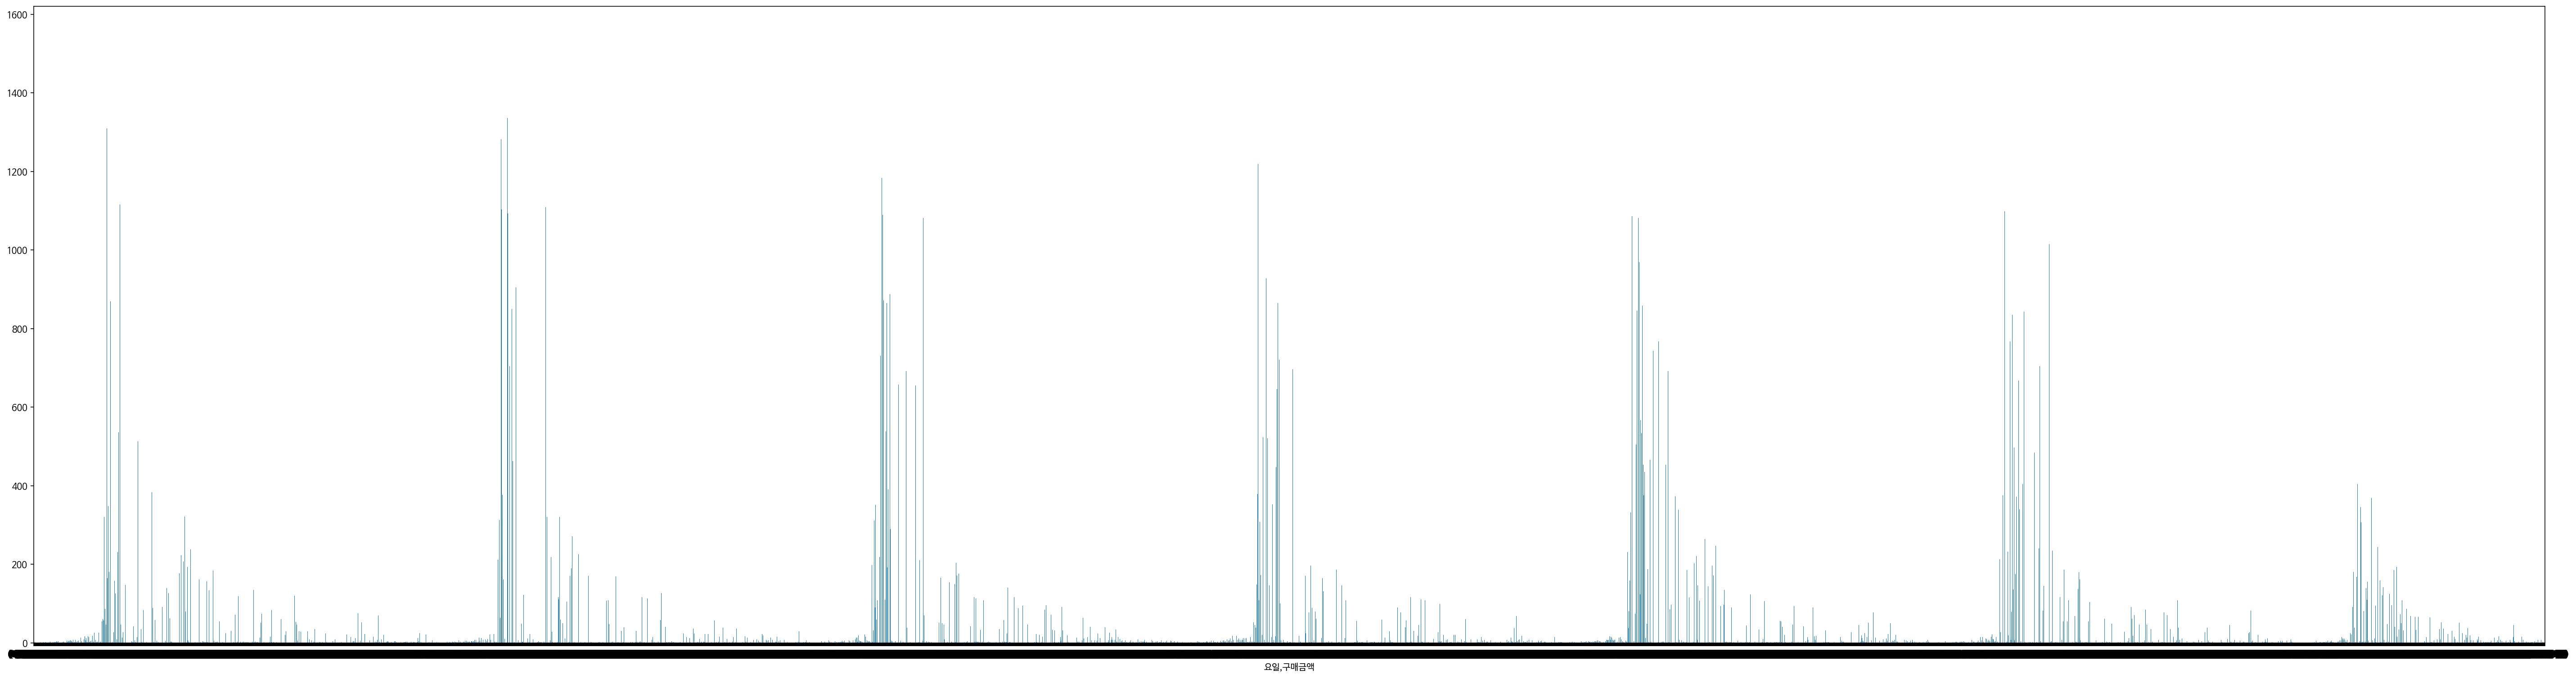

In [ ]:
_temp = df_test['요일'].value_counts()
plt.figure(figsize=(50,13))
df_group = df_test.groupby(['요일','구매금액'],as_index=False).size()
df_group.plot(kind = 'bar',rot = 0)
plt.show()

In [ ]:
df_t1 = pd.read_csv('/content/drive/My Drive/(개인)_AI _빅데이터_아카데미/B1_마켓_DataSet/product_member_data.csv',engine='python',encoding='euc-kr')
df_t1_c = df_m.copy()
df_t1.head()

,Unnamed: 0,공급일자,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,구매시각,hour,연령,연령대,주소,성별,배송서비스신청여부,모바일알람여부,Gold_member
0,0,2018-01-02,272369856,정상회원,과실,과일,사과,사과/유(1.5kg),1.0,22207,매장C,NaN,10:04,10,45,40,수지구-풍덕천동,여,미신청,수신,VIP
1,1,2018-01-02,1476143616,정상회원,간식,빵,"식빵, 식사대용",아침빵(240g/8개)/매장,1.0,4403,매장C,NaN,10:09,10,34,30,수지구-풍덕천동,여,미신청,.,normal
2,2,2018-01-02,743192512,정상회원,채소,양념채소,생강,생강(300g),1.0,7083,매장C,NaN,10:12,10,51,50,수지구-성복동,여,신청,.,normal
3,3,2018-01-02,176912064,정상회원,축산물,유제품,우유/산양유,유기농저지방우유(종이팩/900ml),1.0,7849,매장C,NaN,10:23,10,69,60,수지구-풍덕천동,여,미신청,.,VIP
4,4,2018-01-02,87592064,정상회원,양념/가루,가루,양념가루,카레(매운맛: 100g),3.0,15507,매장C,NaN,10:29,10,73,70,수지구-풍덕천동,여,미신청,.,normal


In [ ]:
# df_money_num = df_product.select_dtypes(exclude='object')
# df_money_num = df_money_num.drop(['반품_원거래일자','회원번호','구매수량'],axis=1)
# df_scale_std = scale(df_money_num)
# df_scale_std = pd.DataFrame(df_scale_std,columns=df_money_num.columns)
# df_money_num.boxplot(figsize=(10,10))

In [ ]:
df_cbg = df_t1[['Gold_member','배송서비스신청여부']]
df_cbg.head()

,Gold_member,배송서비스신청여부
0,VIP,미신청
1,normal,미신청
2,normal,신청
3,VIP,미신청
4,normal,미신청


In [ ]:
down = df_cbg['Gold_member'].value_counts()
top = df_cbg['배송서비스신청여부'].value_counts()
print(down,top)

normal    251531
VIP        43114
Name: Gold_member, dtype: int64 미신청    239342
신청      55303
Name: 배송서비스신청여부, dtype: int64


In [ ]:
df_cbg.head()

,Gold_member,배송서비스신청여부
0,VIP,미신청
1,normal,미신청
2,normal,신청
3,VIP,미신청
4,normal,미신청


In [ ]:
gold_apply = df_cbg[df_cbg['Gold_member'] == 'VIP']
gold_apply

,Gold_member,배송서비스신청여부
0,VIP,미신청
3,VIP,미신청
5,VIP,미신청
7,VIP,미신청
9,VIP,미신청
...,...,...
294579,VIP,미신청
294612,VIP,미신청
294626,VIP,미신청
294629,VIP,미신청


In [ ]:
gold_apply = gold_apply[gold_apply['배송서비스신청여부'] == '신청']
gold_apply.head()

,Gold_member,배송서비스신청여부


In [ ]:
msg = df_t1[['Gold_member','모바일알람여부']]

In [ ]:
msg =  msg[msg['Gold_member'] == 'VIP']
# gold_msg = gold_msg[gold_msg['모바일알람여부'] == '수신']
# gold_msg.count()

In [ ]:
gold_msg = msg[msg['Gold_member'] == 'VIP']


In [ ]:
gold_msg = gold_msg[gold_msg['모바일알람여부'] == '수신']
gold_msg.head()

,Gold_member,모바일알람여부
0,VIP,수신
5,VIP,수신
7,VIP,수신
9,VIP,수신
17,VIP,수신


In [ ]:
gold_not_msg = msg[msg['Gold_member'] == 'VIP']
gold_not_msg = gold_not_msg[gold_not_msg['모바일알람여부'] == '.']
gold_not_msg.count()

Gold_member    8488
모바일알람여부        8488
dtype: int64

In [ ]:
non_gold_msg = msg[msg['Gold_member'] != 'VIP']
non_gold_msg = msg[msg['모바일알람여부'] == '수신']
non_gold_msg.head()

,Gold_member,모바일알람여부
0,VIP,수신
5,VIP,수신
7,VIP,수신
9,VIP,수신
17,VIP,수신


In [ ]:
non_gold_non_msg = msg[msg['Gold_member'] != 'VIP']
non_gold_non_msg = msg[msg['모바일알람여부'] != '수신']
non_gold_non_msg.head()

,Gold_member,모바일알람여부
3,VIP,.
68,VIP,.
111,VIP,.
149,VIP,.
156,VIP,.


In [ ]:
msg = df_t1[['Gold_member','모바일알람여부']]

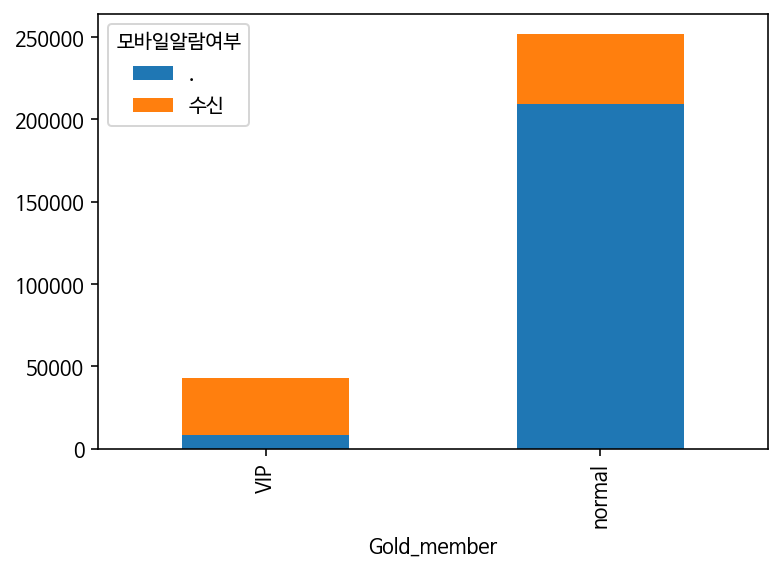

In [ ]:
msg.pivot_table(values=msg.groupby(by='모바일알람여부').count(), index='Gold_member', columns='모바일알람여부', aggfunc=len).plot(kind='bar',stacked=True)